# Feature Engineering

## Carga de datos

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# Load the dataset
df_clean_companies = pd.read_csv('../data/clean/df_clean_companies.csv')
df_clean_index = pd.read_csv('../data/clean/df_clean_index.csv')
df_clean_stocks = pd.read_csv('../data/clean/df_clean_stocks.csv')

## Creacion de nuevas variables

### Transformacion

#### Companies

In [243]:
# Transformacion de datos (Fulltimeemployees, Marketcap) a int 
df_clean_companies['Fulltimeemployees'] = df_clean_companies['Fulltimeemployees'].astype('int')
df_clean_companies['Marketcap'] = df_clean_companies['Marketcap'].astype('int')

# Verificar los cambios
print(df_clean_companies.dtypes)

Exchange                object
Symbol                  object
Shortname               object
Longname                object
Sector                  object
Industry                object
Currentprice           float64
Marketcap                int64
Ebitda                 float64
Revenuegrowth          float64
City                    object
State                   object
Country                 object
Fulltimeemployees        int64
Longbusinesssummary     object
Weight                 float64
dtype: object


#### Index 

Transformamos la variable date a datetime

In [244]:
# 'Date' to datetime
df_clean_index['Date'] = pd.to_datetime(df_clean_index['Date'])

In [245]:
df_clean_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   S&P500  2517 non-null   float64       
 2   Year    2517 non-null   int64         
 3   Month   2517 non-null   int64         
 4   Day     2517 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 98.4 KB


Creamos variables derivadas para posibles analisis por periodos separados

In [246]:
# Variables derivadas dia, mes, año
df_clean_index['Year'] = df_clean_index['Date'].dt.year  
df_clean_index['Month'] = df_clean_index['Date'].dt.month  
df_clean_index['Day'] = df_clean_index['Date'].dt.day  

# Verificar las nuevas columnas
df_clean_index.head()

,Date,S&P500,Year,Month,Day
0,2014-12-22,2078.54,2014,12,22
1,2014-12-23,2082.17,2014,12,23
2,2014-12-24,2081.88,2014,12,24
3,2014-12-26,2088.77,2014,12,26
4,2014-12-29,2090.57,2014,12,29


#### Stocks

Cambiamos los tipos de datos correspondientes

In [247]:
# 'Date' to datetime
df_clean_stocks['Date'] = pd.to_datetime(df_clean_stocks['Date'])

# Volume to int
df_clean_stocks['Volume'] = df_clean_stocks['Volume'].astype('int')

# Verificar los cambios
print(df_clean_stocks.dtypes)

Date         datetime64[ns]
Symbol               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
Year                  int64
Month                 int64
Day                   int64
dtype: object


In [248]:
# Variables derivada: cambio entre high y low
df_clean_stocks['Cambio_HighLow'] = df_clean_stocks['High'] - df_clean_stocks['Low']
df_clean_stocks['Cambio_CloseOpen'] = df_clean_stocks['Close'] - df_clean_stocks['Open']

# Crear la variable Accion_Sube
df_clean_stocks['Accion_Sube'] = np.where(df_clean_stocks['Cambio_CloseOpen'] > 0, 1, 0)

# Variables derivadas dia, mes, año
df_clean_stocks['Year'] = df_clean_stocks['Date'].dt.year  
df_clean_stocks['Month'] = df_clean_stocks['Date'].dt.month  
df_clean_stocks['Day'] = df_clean_stocks['Date'].dt.day  

# Verificar las nuevas columnas
df_clean_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,Cambio_HighLow,Cambio_CloseOpen,Accion_Sube
0,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600,2010,1,4,0.218333,0.140000,1
1,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200,2010,1,5,0.123334,-0.091667,0
2,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000,2010,1,6,0.103333,0.008333,1
3,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000,2010,1,7,0.113333,0.008333,1
4,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600,2010,1,8,0.173333,0.141666,1


## Seleccion extrema

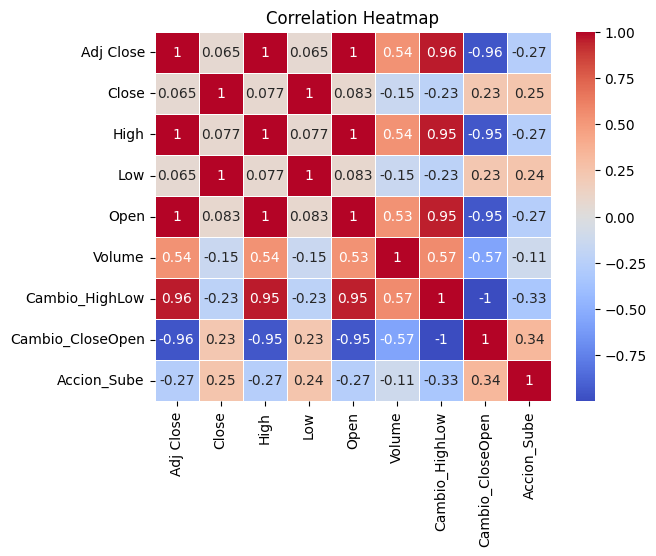

In [249]:
# Matriz de correlacion
numeric_df = df_clean_stocks.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [250]:
# Drop high, low
df_clean_stocks.drop(columns=['High', 'Low'], inplace=True)

# Drop adj close, Volume
df_clean_stocks.drop(columns=['Adj Close', 'Volume'], inplace=True)

# Drop Cambio_HighLow
df_clean_stocks.drop(columns=['Cambio_HighLow'], inplace=True)

# Drop Year, Month, Day
df_clean_stocks.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Verificar dataset
df_clean_stocks.head()


,Date,Symbol,Close,Open,Cambio_CloseOpen,Accion_Sube
0,2010-01-04,AOS,7.435000,7.295000,0.140000,1
1,2010-01-05,AOS,7.340000,7.431667,-0.091667,0
2,2010-01-06,AOS,7.343333,7.335000,0.008333,1
3,2010-01-07,AOS,7.365000,7.356667,0.008333,1
4,2010-01-08,AOS,7.473333,7.331667,0.141666,1


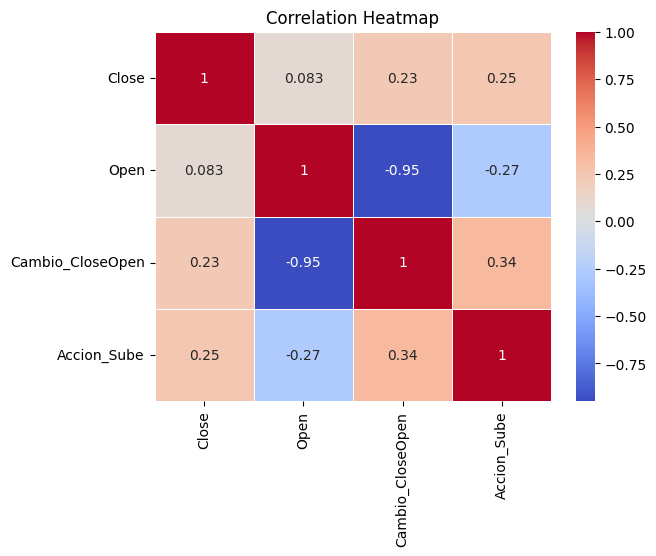

In [251]:
# Matriz de correlacion
numeric_df = df_clean_stocks.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Preparacion de datos para entrenamiento

Creacion de variables lag de 4 dias anteriores para poder predecir el dia siguiente. Se toma en cuenta el precio de apertura, precio de cierre, cambio_CloseOpen y Accion_Sube.

In [252]:
# Lag variables dia 1
df_clean_stocks['Open_Lag1'] = df_clean_stocks['Open'].shift(1)
df_clean_stocks['Close_Lag1'] = df_clean_stocks['Close'].shift(1)
df_clean_stocks['Cambio_CloseOpen_Lag1'] = df_clean_stocks['Cambio_CloseOpen'].shift(1)
df_clean_stocks['Accion_Sube_Lag1'] = df_clean_stocks['Accion_Sube'].shift(1)


# Lag variables dia 2
df_clean_stocks['Open_Lag2'] = df_clean_stocks['Open'].shift(2)
df_clean_stocks['Close_Lag2'] = df_clean_stocks['Close'].shift(2)
df_clean_stocks['Cambio_CloseOpen_Lag2'] = df_clean_stocks['Cambio_CloseOpen'].shift(2)
df_clean_stocks['Accion_Sube_Lag2'] = df_clean_stocks['Accion_Sube'].shift(2)


# Lag variables dia 3
df_clean_stocks['Open_Lag3'] = df_clean_stocks['Open'].shift(3)
df_clean_stocks['Close_Lag3'] = df_clean_stocks['Close'].shift(3)
df_clean_stocks['Cambio_CloseOpen_Lag3'] = df_clean_stocks['Cambio_CloseOpen'].shift(3)
df_clean_stocks['Accion_Sube_Lag3'] = df_clean_stocks['Accion_Sube'].shift(3)


# Lag variables dia 4
df_clean_stocks['Open_Lag4'] = df_clean_stocks['Open'].shift(4)
df_clean_stocks['Close_Lag4'] = df_clean_stocks['Close'].shift(4)
df_clean_stocks['Cambio_CloseOpen_Lag4'] = df_clean_stocks['Cambio_CloseOpen'].shift(4)
df_clean_stocks['Accion_Sube_Lag4'] = df_clean_stocks['Accion_Sube'].shift(4)

In [253]:
df_clean_stocks.head()

,Date,Symbol,Close,Open,Cambio_CloseOpen,Accion_Sube,Open_Lag1,Close_Lag1,Cambio_CloseOpen_Lag1,Accion_Sube_Lag1,...,Cambio_CloseOpen_Lag2,Accion_Sube_Lag2,Open_Lag3,Close_Lag3,Cambio_CloseOpen_Lag3,Accion_Sube_Lag3,Open_Lag4,Close_Lag4,Cambio_CloseOpen_Lag4,Accion_Sube_Lag4
0,2010-01-04,AOS,7.435000,7.295000,0.140000,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,AOS,7.340000,7.431667,-0.091667,0,7.295000,7.435000,0.140000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,AOS,7.343333,7.335000,0.008333,1,7.431667,7.340000,-0.091667,0.0,...,0.140000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,AOS,7.365000,7.356667,0.008333,1,7.335000,7.343333,0.008333,1.0,...,-0.091667,0.0,7.295000,7.435,0.140000,1.0,NaN,NaN,NaN,NaN
4,2010-01-08,AOS,7.473333,7.331667,0.141666,1,7.356667,7.365000,0.008333,1.0,...,0.008333,1.0,7.431667,7.340,-0.091667,0.0,7.295,7.435,0.14,1.0


In [254]:
df_clean_stocks.set_index('Date', inplace=True)
df_clean_stocks.head()

,Symbol,Close,Open,Cambio_CloseOpen,Accion_Sube,Open_Lag1,Close_Lag1,Cambio_CloseOpen_Lag1,Accion_Sube_Lag1,Open_Lag2,...,Cambio_CloseOpen_Lag2,Accion_Sube_Lag2,Open_Lag3,Close_Lag3,Cambio_CloseOpen_Lag3,Accion_Sube_Lag3,Open_Lag4,Close_Lag4,Cambio_CloseOpen_Lag4,Accion_Sube_Lag4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,AOS,7.435000,7.295000,0.140000,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,AOS,7.340000,7.431667,-0.091667,0,7.295000,7.435000,0.140000,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,AOS,7.343333,7.335000,0.008333,1,7.431667,7.340000,-0.091667,0.0,7.295000,...,0.140000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,AOS,7.365000,7.356667,0.008333,1,7.335000,7.343333,0.008333,1.0,7.431667,...,-0.091667,0.0,7.295000,7.435,0.140000,1.0,NaN,NaN,NaN,NaN
2010-01-08,AOS,7.473333,7.331667,0.141666,1,7.356667,7.365000,0.008333,1.0,7.335000,...,0.008333,1.0,7.431667,7.340,-0.091667,0.0,7.295,7.435,0.14,1.0


### Guardar Data

In [255]:
dataframes = {'df_curated_companies': df_clean_companies, 'df_curated_index': df_clean_index, 'df_curated_stocks': df_clean_stocks}

for name, df in dataframes.items():
    file_path = f"../data/curated/{name}.csv"
    df.to_csv(file_path, index=False)
    print(f"Archivo guardado: {file_path}")

Archivo guardado: ../data/curated/df_curated_companies.csv
Archivo guardado: ../data/curated/df_curated_index.csv
Archivo guardado: ../data/curated/df_curated_stocks.csv


## Justificacion

La eliminación de las columnas Adj Close, High, y Low se justifica por redundancia o simplificación del análisis. Estas variables tienen una alta correlacion por lo que podemos eliminarlas para evitar ruido en el analisis. Las columnas High y Low se reemplazan efectivamente con la nueva variable Cambio_HighLow. Esta tiene una correlacion con la columna Cambio_CloseOpen por lo que tambien se la puede eliminar. Estas columnas de cambio capturan la volatilidad diaria de las acciones en un solo valor, simplificando el análisis sin perder información relevante.

Para poder realizar una prediccion de si sube o baja una accion, se crean variables lag para registrar los datos de los precios de apertura, cierre y cambios de los precios, de los 4 anteriores dias. Igualmente se crea una variable binaria adicional que nos indica si ese dia la accion subio (1) o bajo (0), dependiendo del cambio que haya tenido con respecto a las variables Open y Close en el periodo (instancia) analizada. 